In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import mpl_toolkits.mplot3d.axes3d as plt_3d
import warnings
warnings.filterwarnings('ignore')

In [116]:

def Greeks_3D(function, greeks,Type):
    St=100
    t=0
    r=0.05
    sigma=0.2
    t_lst=np.linspace(0,1,100)
    
    k_lst=np.linspace(50,150,100)
    
    V=np.zeros((len(t_lst),len(k_lst)))
    for j in range(len(k_lst)):
        for i in range(len(t_lst)):
            V[i,j]=function(St,k_lst[j],r,t,t_lst[i],sigma,Type)
    
    x,y=np.meshgrid(k_lst,t_lst)
    fig=plt.figure(figsize=(10,8))
    plot=plt_3d.Axes3D(fig)
    plot.plot_surface(x, y, V,cmap='rainbow')
    plot.set_xlabel('Strike $K$')
    plot.set_ylabel('Maturity $T$')
    plot.set_zlabel('%s(K,T)'%greeks)
    plot.set_title('The %s of European %s Option'%(greeks,Type),fontsize=15)
def Greeks_2D(function,greeks,Type):
    St=100
    K=100
    t=0
    r=0.05
    sigma=0.2
    t_lst=np.array([0.25,0.5,0.75,1])
    
    S_lst=np.linspace(50,150,100)
    
    V=np.zeros((len(t_lst),len(S_lst)))
    for j in range(len(S_lst)):
        for i in range(len(t_lst)):
            V[i,j]=function(S_lst[j],K,r,t,t_lst[i],sigma,Type)
    fig=plt.figure(figsize=(10,8))
    for i in range(V.shape[0]):
        plt.plot(S_lst,V[i],label="T=%s"%(t_lst[i]))
    if Type=="call":
        v_min=0
        v_max=1
    elif Type=='put':
        v_min=-1
        v_max=0
    plt.vlines( 125, np.min(V), np.max(V), linestyles='dashed', colors='red')
    plt.vlines( K, np.min(V), np.max(V), linestyles='dashed', colors='black')
    plt.legend()
    plt.title("Variation of %s of a European %s Option w.r.t S and T"
              %(greeks,Type),fontsize=15)

def Time_2D(function,greeks,Type):
    St=100
    K=100
    t=0
    r=0.05
    sigma=0.2
    T=1
    t_lst=np.linspace(0,1,100)

    S_lst=np.array((St-20,St,St+10))

    V=np.zeros((len(S_lst),len(t_lst)))
    fig=plt.figure(figsize=(10,8))

    for j in range(len(S_lst)):
        for i in range(len(t_lst)):
            V[j,i]=function(S_lst[j],K,r,t,t_lst[i],sigma,Type)
    for i in range(V.shape[0]):
        plt.plot(t_lst,V[i],label="S=%s"%(S_lst[i]))
    if Type=="call":
        v_min=0
        v_max=1
    elif Type=='put':
        v_min=-1
        v_max=0
    plt.xlabel('Time to expiration',fontsize=12)
    plt.ylabel('%s'%(greeks),fontsize=12)
    plt.legend()
    plt.title("Variation of %s of w.r.t time to maturity for a European %s Option "
              %(greeks,Type),fontsize=15)

# Greeks for Option

<font size=5 >*1. General Instructions*</font>

In the last lecture, we mentioned the concept of _$\Delta$_ when we introduced the Black Scoles Pricing Model. It tells us how the option price will change when the price of underlying asset changes by one unit. In fact, people also care about how the price of an option changes when other parameters of the model change at the same time. These are **Greeks** that I want to introduce now.

All Greeks are first-order or second-order partial derivatives of the option price w.r.t different underlying factors, which are used to measure the risks-as well as potential returns-of the financial derivative.

The following simple Greeks for a derivative _f_ are routinely used by financial institutions:
- Delta: $\Delta = \frac{\partial f}{\partial S}$


- Gamma: $\Gamma = \frac{{\partial}^2 f}{\partial S^2}$


- Theta: $\Theta = \frac{\partial f}{\partial t}$


- Vega: $\nu = \frac{\partial f}{\partial \sigma}$


- Rho: $\rho = \frac{\partial f}{\partial r}$


<font size=5 >*2. Delta*</font>

For a European Call without dividend, $\Delta$:
<font size=4 >
$$Delta = \frac{\partial C}{\partial S} = N(d_1)$$

For a European Put without dividend, $\Delta$: 
<font size=4 >
$$Delta = \frac{\partial P}{\partial S} = 1 - N(d_1)$$


Sensitive Analysis

The codes and pictures attached below show the variation of $\Delta$ of a European Call option w.r.t K, T and S. r=0.05, $\sigma$ = 0.2

In [102]:
def BSM_Delta(St, K, r, t, T,sigma, Type):
    d1= (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T-t)
    if Type=='call':
        delta=ss.norm.cdf(d1)
    elif Type=='put':
        delta=-(1-ss.norm.cdf(d1))
    else:
        print('Type Error')
    return delta

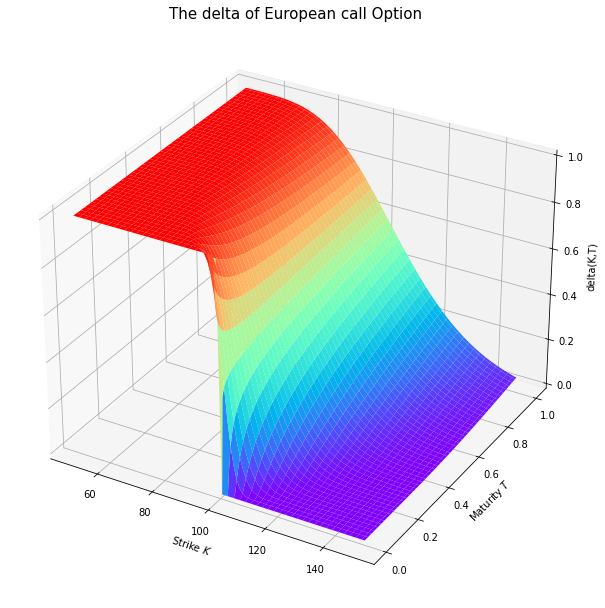

In [103]:
Greeks_3D(BSM_Delta,'delta','call')

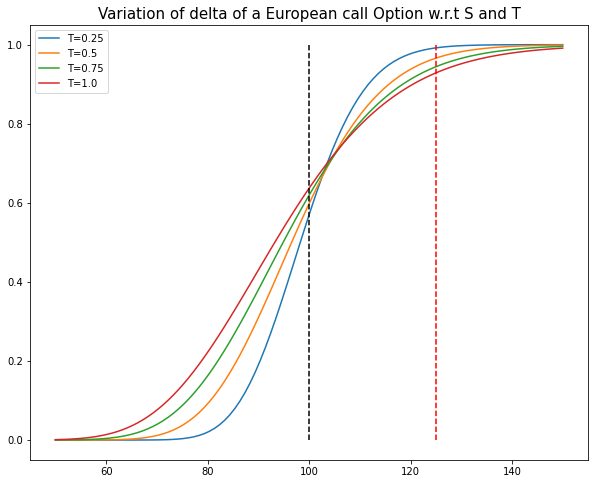

In [104]:
Greeks_2D(BSM_Delta,'delta','call')

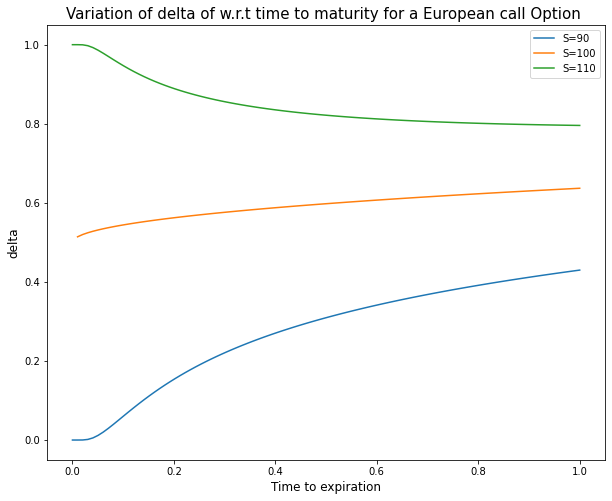

In [105]:
Time_2D(BSM_Delta,'delta','call')

<font size=3>The close the expiration date is, the less valuable for the OTM option will be, and the Delta will approach 0, the Delta of ITM option will tend to be 1 instead.

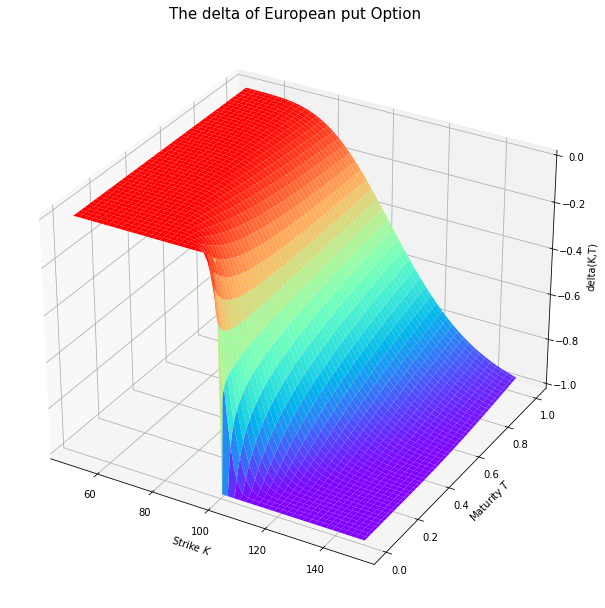

In [106]:
Greeks_3D(BSM_Delta,'delta','put')

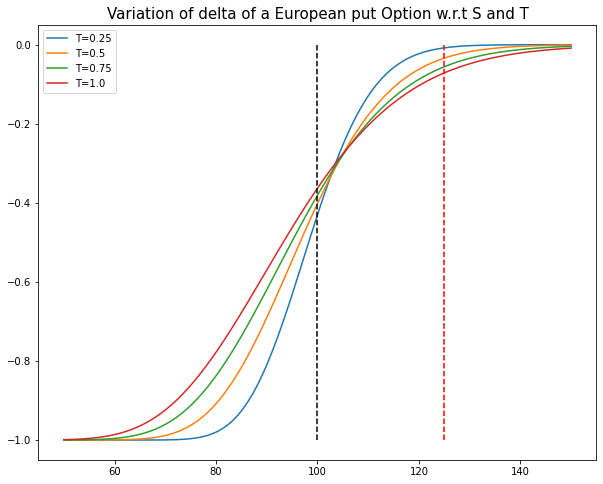

In [107]:
Greeks_2D(BSM_Delta,'delta','put')

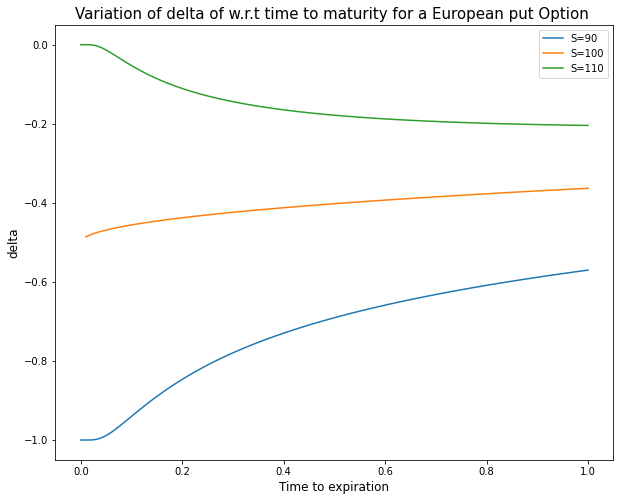

In [108]:
Time_2D(BSM_Delta,'delta','put')

<font size=5 >*3. Gamma*</font>

For palin vanilla options without dividends, the $\Gamma $ is:
<font size=4 >
$$\Gamma = \frac{{\partial}^2 C}{\partial S^2} = \frac{ N^{'}(d_1)}{S\sigma{\sqrt{T-t}}}$$ 
with $$N^{'}(d_1) = \frac{1}{\sqrt{2\pi}}e^{-1/2d^2_1}$$
</font> 

Whether it is a call option or a put option, as long as you **long** the option, Gamma is **positive**, otherwise it is **negative**.Because the numerator and denominator are both greater than 0. 
Or we can observe the "Delta" pictures attached above, since $\Gamma$ is second-order partial derivatives of the option price w.r.t S, we can also think of it as the first-order partial derivative of the $\Delta$ w.r.t S. When we look at the "Delta" pictures, the slope of function, or $\Gamma$, is always positive as long as you long the option.


Sensitive Analysis

The codes and pictures attached below show the variation of $\Gamma$ of a European Call option w.r.t K, T and S. r=0.05, $\sigma$ = 0.25

In [19]:
def BSM_Gamma(St, K, r, t, T,sigma,Type):
    d1= (np.log(St/K)+(r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    pdf=np.exp(-0.5*d1**2)/np.sqrt(2*np.pi)
    gamma=pdf/(St*sigma*np.sqrt(T-t))
    return gamma

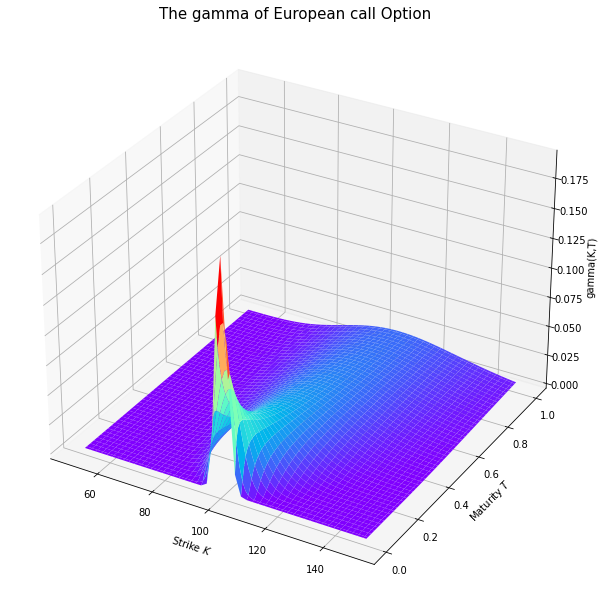

In [20]:
Greeks_3D(BSM_Gamma,'gamma','call')

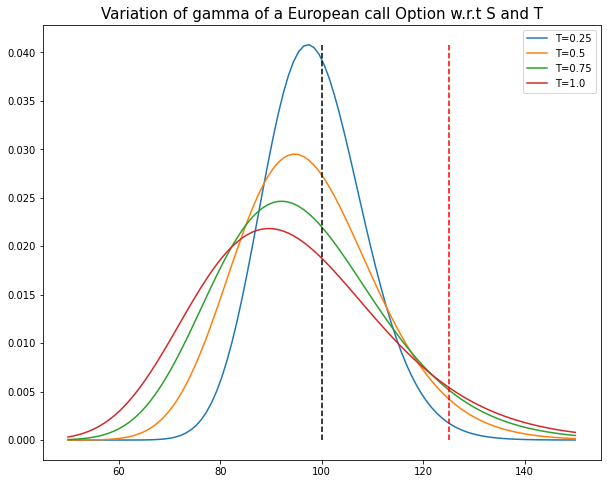

In [21]:
Greeks_2D(BSM_Gamma,'gamma','call')

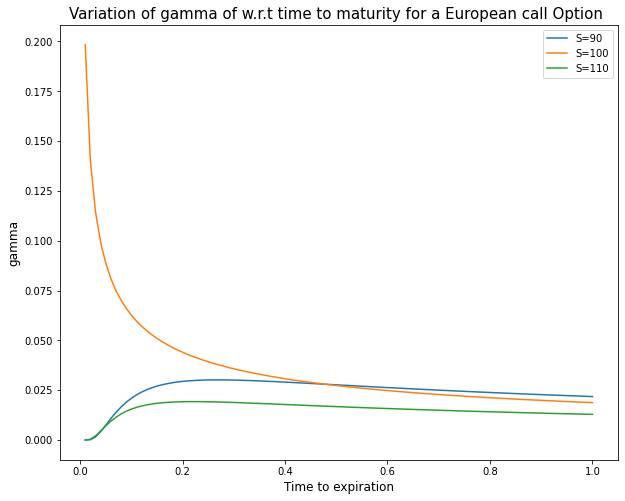

In [117]:
Time_2D(BSM_Gamma,'gamma','call')

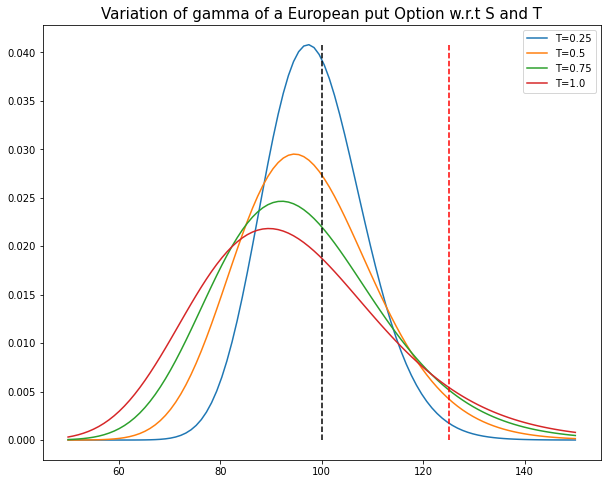

In [22]:
Greeks_2D(BSM_Gamma,'gamma','put')

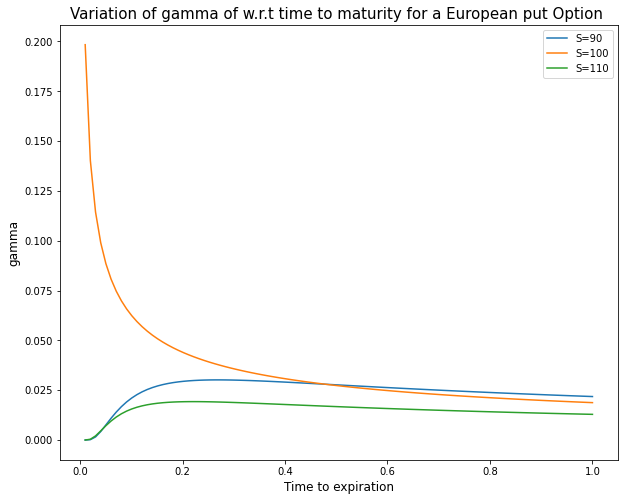

In [118]:
Time_2D(BSM_Gamma,'gamma','put')

<font size=5 >*4. Theta*</font>

For palin vanilla options without dividends, the $\Gamma $ is:
<font size=4 >
$$\Theta = \frac{{\partial} C}{\partial t}$$ 
for Call option $$\Theta _{call} = \frac{S_0 N^{'}(d_1)\sigma}{2{\sqrt{T-t}}}- rKe^{-r(T-t)}N(d_2)$$
</font>     
for Put option:
<font size=4 >
$$\Theta_{put}=\Theta_{call} + rKe^{-r(T-t)}$$
</font> 


According to the formula, we can notice that the theta for call is always smaller than 0, which mean the value of option will decay as the time goes by.
But there is an exception that for the deep in the money put option, it may be positive. Intuitively, assuming that the price of a certain stock has fallen to close to 0, as the expiration date approaches, the probability of the stock rising is lower, so its put has greater certainty to make money. Since the put option is deep in the moeny, option holder hope that the time will end quickly so that they can get the profit ASAP. Therefore theta is position in this situation.


In [32]:
def BSM_Theta(St, K, r, t, T,sigma,Type):
    d1= (np.log(St/K)+(r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    pdf=np.exp(-0.5*d1**2)/np.sqrt(2*np.pi)
    if Type=='call':
        theta=-(St*pdf*sigma)/(2*np.sqrt(T-t)) - r*np.exp(-r*(T-t))*ss.norm.cdf(d2)
    elif Type=='put':
        theta=-(St*pdf*sigma)/(2*np.sqrt(T-t)) + r*np.exp(-r*(T-t))*ss.norm.cdf(-d2)
    return theta

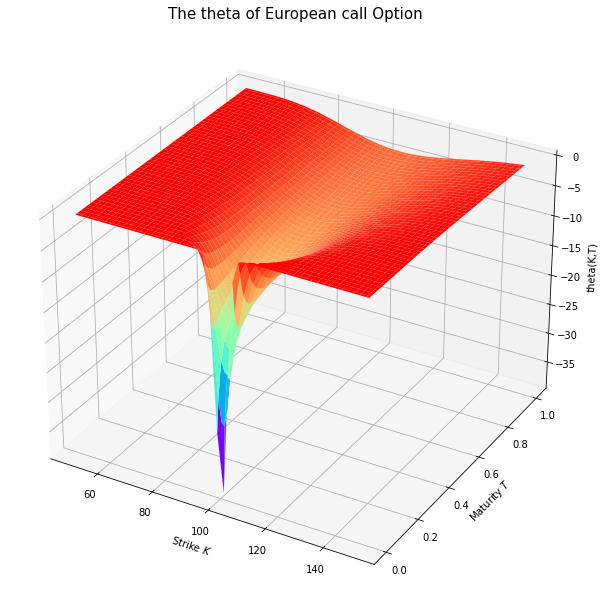

In [33]:
Greeks_3D(BSM_Theta,'theta','call')

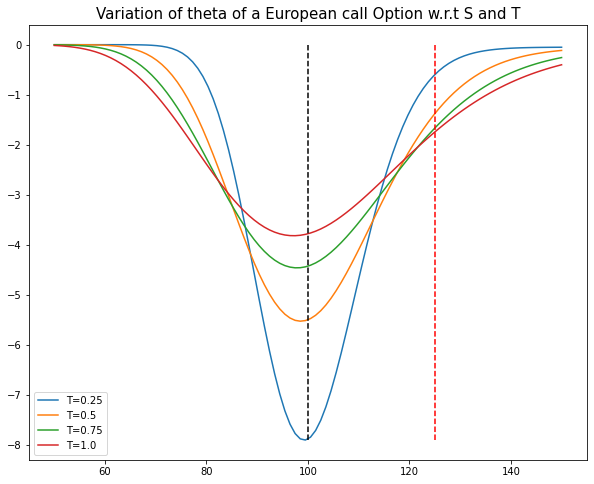

In [34]:
Greeks_2D(BSM_Theta,'theta','call')

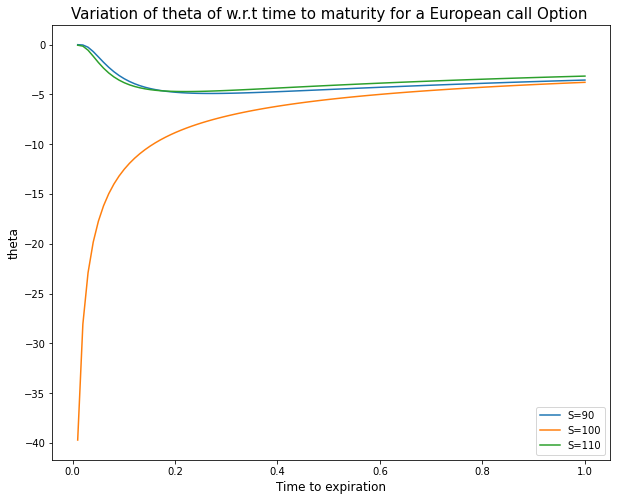

In [119]:
Time_2D(BSM_Theta,'theta','call')

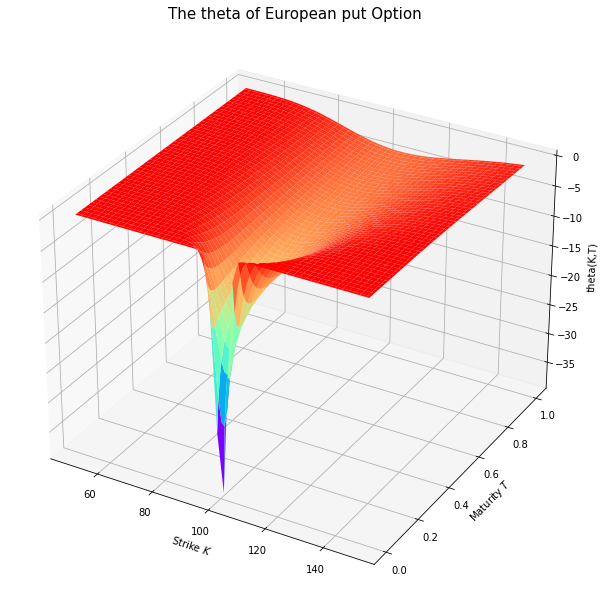

In [35]:
Greeks_3D(BSM_Theta,'theta','put')

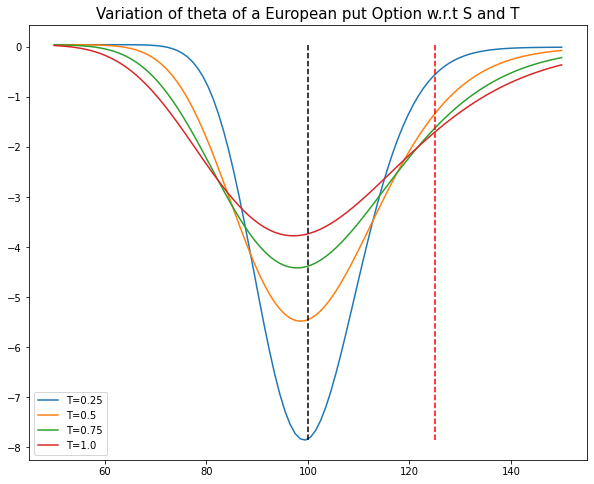

In [36]:
Greeks_2D(BSM_Theta,'theta','put')

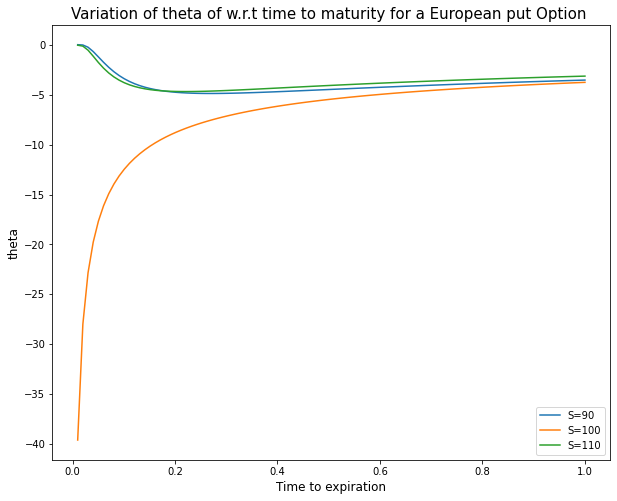

In [120]:
Time_2D(BSM_Theta,'theta','put')

<font size=5 >*5. Vega*</font>

In the pricing model we talked previously, we set volatility as a constant. In fact, volatility is also constantly changing. The price of derivatives will also change due to changes in volatility. We call this it as $\nu$


<font size=4 >
$$\nu = \frac{\partial C}{\partial \sigma}$$ 

For palin vanilla options without dividends, the $\nu $ is:
$$\nu = \frac{\partial C}{\partial \sigma} = \frac{\partial P}{\partial \sigma} = S_0\sqrt T N^{'}(d_1)$$
</font> 
An increase in volatility causes call and put option prices to increase

The Vega of the underlying asset is 0. Therefore, if we need Vega neutrality, we need to realize it through buying and selling options.


Sensitive Analysis

The codes and pictures attached below show the variation of $\Gamma$ of a European Call option w.r.t K, T and S. r=0.05, $\sigma$ = 0.25

In [40]:
def BSM_Vega(St, K, r, t, T,sigma,Type):
    d1= (np.log(St/K)+(r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    pdf=np.exp(-0.5*d1**2)/np.sqrt(2*np.pi)
    vega=St*pdf*np.sqrt(T-t)
    return vega

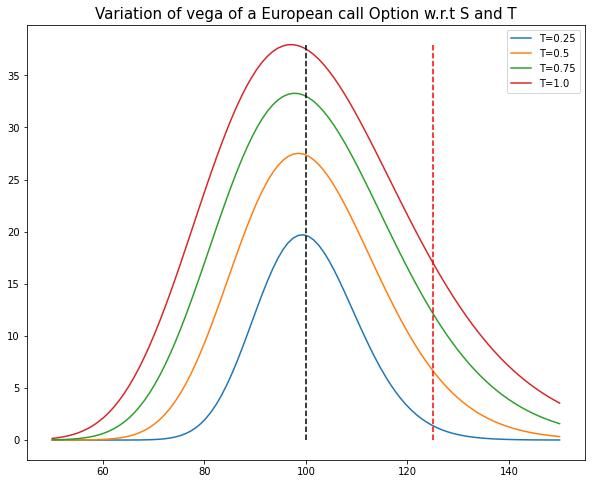

In [41]:
Greeks_2D(BSM_Vega,'vega','call')

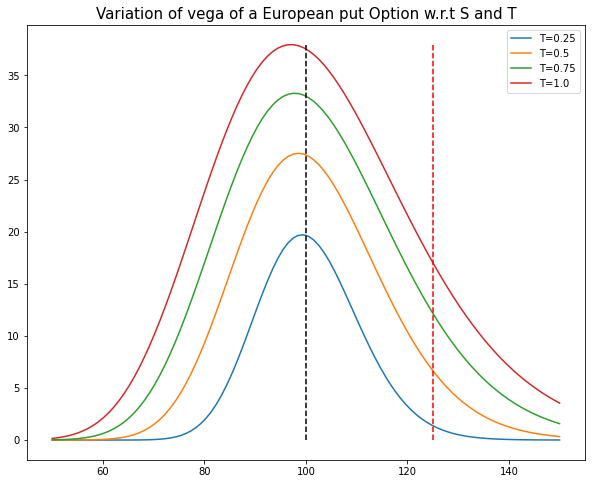

In [42]:
Greeks_2D(BSM_Vega,'vega','put')

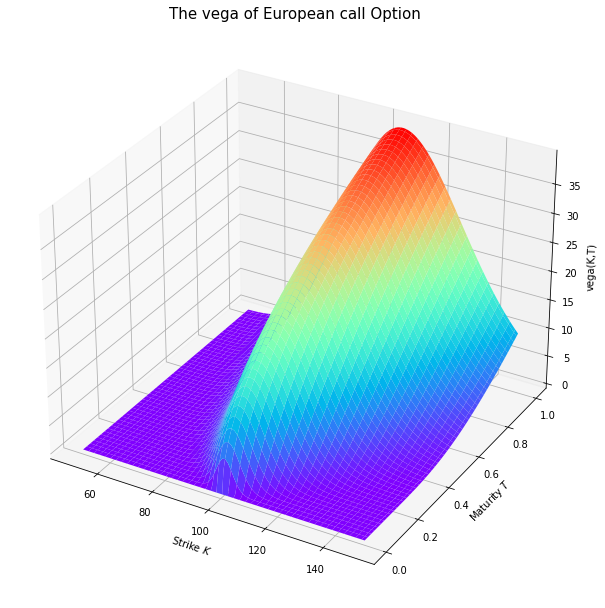

In [43]:
Greeks_3D(BSM_Vega,'vega','call')

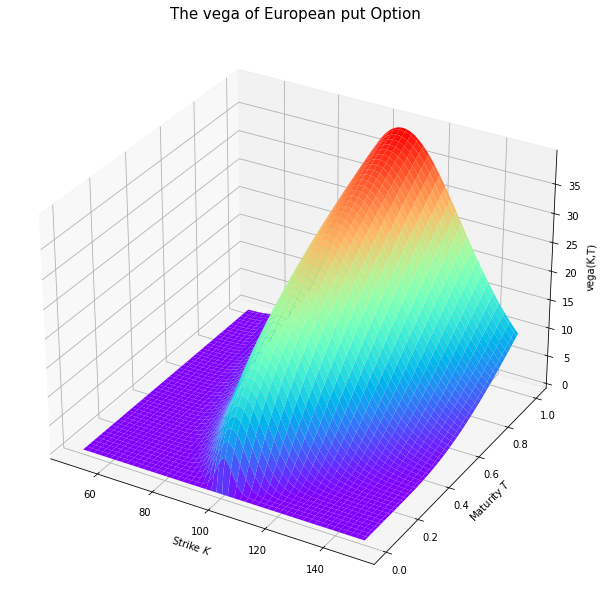

In [44]:
Greeks_3D(BSM_Vega,'vega','put')

<font size=5 >*6. Rho*</font>

Rho describes the rate of change of option value with interest rate r


<font size=4 >
$$\rho = \frac{{\partial} C}{\partial r}$$
$$\rho_{call} = KTe^{-rT}N(d_2)$$
$$\rho_{put} = -KTe^{-rT}N(-d_2)$$
</font> 

We find that an increase in interest rates increases the value of calls and decreases the value of puts. This is in line with our intuition. When the interest rate rises (assuming the asset price remains unchanged), the discounted strike price becomes less. Therefore, call is equivalent to buying assets at a cheaper price, and the price will increase. put is the opposite.


Sensitive Analysis

In [45]:
def BSM_Rho(St, K, r, t, T,sigma,Type):
    d1= (np.log(St/K)+(r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    if Type=='call':
        rho=K*(T-t)*np.exp(-r*(T-t))*ss.norm.cdf(d2)
    elif Type=='put':
        rho=-K*(T-t)*np.exp(-r*(T-t))*ss.norm.cdf(-d2)
    return rho

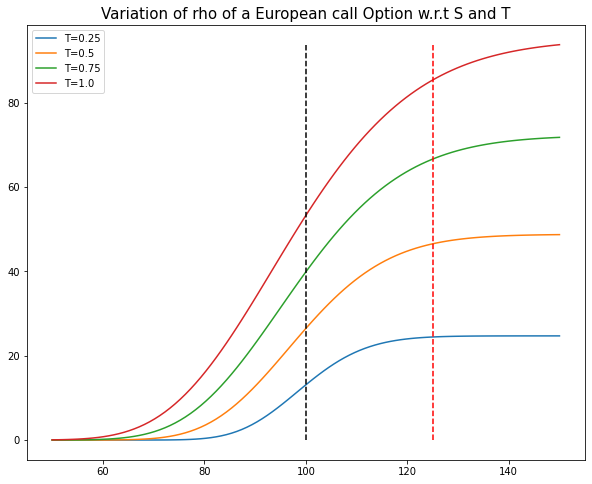

In [46]:
Greeks_2D(BSM_Rho,'rho','call')

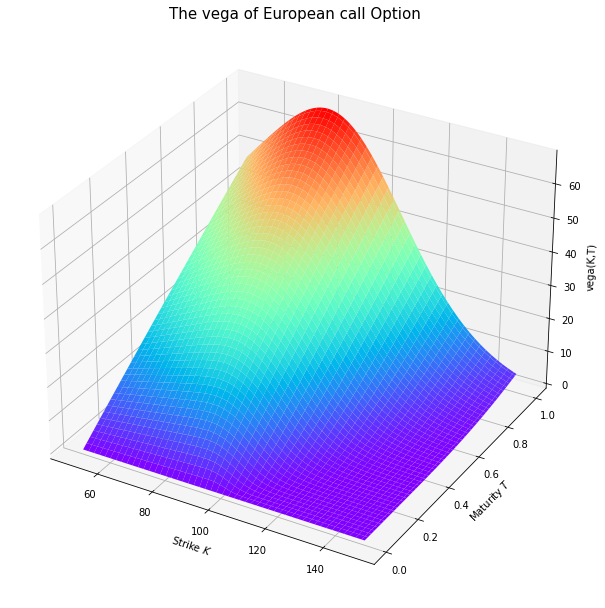

In [47]:
Greeks_3D(BSM_Rho,'vega','call')

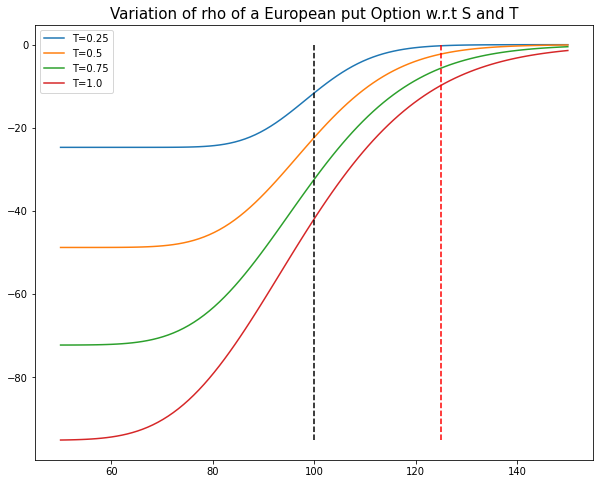

In [48]:
Greeks_2D(BSM_Rho,'rho','put')

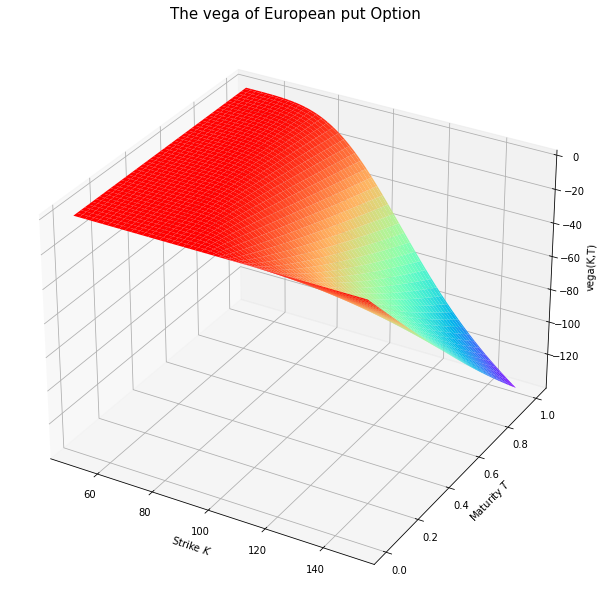

In [49]:
Greeks_3D(BSM_Rho,'vega','put')



According to the Differential Equation of Black-Scholes model, we know:

$$r\Pi= {\frac{\partial \Pi}{\partial S}}rS + {\frac{1}{2}}{\frac{{\partial}^2 {\Pi}}{\partial S^2}{\sigma}^2{S^2}} + {\frac{\partial \Pi}{\partial t}}$$

Since we know the $\Delta , \Gamma, \Theta$, the equation can be written as:

$$\Theta + rS\Delta + {\frac{1}{2}}\sigma^2 S^2\Gamma = r \Pi$$


Consider a Delta Neutral portfolio $\Pi$, we can get a new equation :
$$\Theta + {\frac{1}{2}}\sigma^2 S^2\Gamma = r \Pi$$

Since, if $\Theta$ of a Delta-neutral portfolio is a large negative number, $\Gamma$ will be a large positive number, which means theta is the ticket to gamma. It's very useful in the strategy of "Gamma Scalping" that I will introduced in the future.